In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

C:\Users\oem\AppData\Local\Temp\ipykernel_4160\1386506125.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:

import pandas as pd

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/new_dataframe_actual_datesfull_adri.csv')

# Contar la cantidad de juegos multijugador y para un solo jugador
multijugador = df[df['Multiplayer'] == 1].shape[0]
solitario = df[df['Multiplayer'] == 0].shape[0]

# Calcular las proporciones
proporcion_multijugador = multijugador / df.shape[0]
proporcion_solitario = solitario / df.shape[0]

print("Cantidad de juegos multijugador:", multijugador)
print("Cantidad de juegos en solitario:", solitario)
print("Proporción de juegos multijugador:", proporcion_multijugador)
print("Proporción de juegos en solitario:", proporcion_solitario)

if proporcion_multijugador > proporcion_solitario:
    print("La hipótesis de que los juegos multijugador son más populares es compatible con los datos.")
elif proporcion_multijugador < proporcion_solitario:
    print("La hipótesis de que los juegos en solitario son más populares es compatible con los datos.")
else:
    print("No se puede concluir que un tipo de juego sea más popular que el otro basado en estos datos.")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/new_dataframe_actual_datesfull_adri.csv'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/new_dataframe_actual_datesfull_adri.csv')

# Eliminar filas con valores faltantes en la columna 'Multiplayer'
df = df.dropna(subset=['Multiplayer'])

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Cantidad de descargas', 'Precio']]  # Puedes agregar más características si lo deseas
y = df['Multiplayer']

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)


Precisión del modelo: 0.7309007981755986


In [ ]:
import pandas as pd
import numpy as np
#import tensorflow as tf
from tensorflow.contrib.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cargar los datos desde el archivo CSV
df = pd.read_csv('C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/new_dataframe_actual_datesfull_adri.csv')

# Eliminar filas con valores faltantes en la columna 'Multiplayer'
df = df.dropna(subset=['Multiplayer'])

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Cantidad de descargas', 'Precio']].values  # Puedes agregar más características si lo deseas
y = df['Multiplayer'].values

# Normalizar las características (es importante en redes neuronales)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo de red neuronal
model = Tokenizer.keras.Sequential([
    Tokenizer.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Tokenizer.keras.layers.Dense(32, activation='relu'),
    Tokenizer.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Evaluar el modelo en el conjunto de prueba
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convertir las probabilidades en etiquetas binarias
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

In [ ]:

# Cargar datos
data = pd.read_csv("C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/new_dataframe_actual_datesfull_roy.csv")

# Dividir datos en características y variable objetivo
X = data['In-Purchased'].values.reshape(-1, 1)  # 'Microtransacciones' es la columna que indica si el juego tiene microtransacciones
y = data['Cantidad de descargas'].values

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy)

Precisión del modelo: 0.4160839160839161


c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
data.isnull().sum()

ID del juego                0
Géneros                    13
Categorías                 25
Fecha de Lanzamiento     3071
Multiplayer                25
Cantidad de descargas       0
Precio                      0
In-Purchased                0
Minutos jugadas          4289
Fecha                       0
Dias_Pasados                0
dtype: int64

In [ ]:
data1 = pd.read_csv("C:/Users/rodri/Documents/Python/Proyecto Integrador Big Data/data/TagsConseguidos/dataB_con_minutos_totales.csv")
data1.head(10)

,ID del juego,Géneros,Categorías,Fecha de Lanzamiento,Multiplayer,Cantidad de descargas,Precio,In-Purchased,Minutos jugadas,Fecha,Dias_Pasados,Minutos jugadas Totales
0,850170,"Action, Strategy, Free to Play","Single-player, Multi-player, Co-op, Online Co-...","{'date': '15 Aug, 2023'}",1.0,755,0,1,NaN,15/08/2023 00:00,237,942
1,866510,"Adventure, Casual, Indie","Single-player, Multi-player, Steam Achievement...","{'date': '6 Jun, 2018'}",1.0,7,199,1,NaN,06/06/2018 00:00,2133,765
2,820030,"Adventure, Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '19 Jun, 2018'}",0.0,7,499,1,NaN,19/06/2018 00:00,2120,769
3,967250,"Action, Adventure, Casual, Indie, RPG, Simulation","Single-player, Steam Achievements, Steam Tradi...","{'date': '5 Nov, 2018'}",0.0,0,99,0,NaN,05/11/2018 00:00,1981,10088
4,703880,"Action, Indie, Strategy","Single-player, Multi-player, PvP, Shared/Split...","{'date': '6 Nov, 2018'}",1.0,0,999,0,NaN,06/11/2018 00:00,1980,1664
5,994910,"Casual, Massively Multiplayer, Simulation, Str...","Multi-player, PvP, Online PvP, Co-op, Online C...","{'date': '23 Sep, 2020'}",1.0,116,0,1,NaN,23/09/2020 00:00,1293,1
6,1013320,"Action, Adventure, Casual, Indie, Massively Mu...","Single-player, Multi-player, MMO, PvP, Online ...","{'date': '26 Sep, 2019'}",1.0,2182,0,1,NaN,26/09/2019 00:00,1656,101992
7,500710,"Action, Adventure, Free to Play, Indie, Massiv...","Multi-player, MMO, Co-op, Cross-Platform Multi...","{'date': '18 Dec, 2017'}",1.0,14,0,1,NaN,18/12/2017 00:00,2303,2370
8,1098340,"Casual, Indie","Single-player, Steam Achievements, Steam Tradi...","{'date': '24 Jun, 2019'}",0.0,2,199,0,NaN,24/06/2019 00:00,1750,3460
9,1015500,"Simulation, Sports","Single-player, Multi-player, Co-op, Shared/Spl...","{'date': '21 Oct, 2019'}",1.0,14,0,0,NaN,21/10/2019 00:00,1631,2887


In [ ]:
data.describe()

,ID del juego,Multiplayer,Precio,In-Purchased,Minutos jugadas,Dias_Pasados
count,4.289000e+03,4264.000000,4289.000000,4289.000000,0.0,4289.000000
mean,6.668598e+05,0.286585,1006.430403,0.051760,NaN,1219.738167
std,5.228837e+05,0.452219,1180.299062,0.221569,NaN,1046.426079
min,1.300000e+03,0.000000,0.000000,0.000000,NaN,39.000000
25%,3.122000e+05,0.000000,99.000000,0.000000,NaN,708.000000
50%,4.863600e+05,0.000000,599.000000,0.000000,NaN,708.000000
75%,8.698800e+05,1.000000,1499.000000,0.000000,NaN,708.000000
max,2.808930e+06,1.000000,14900.000000,1.000000,NaN,9779.000000


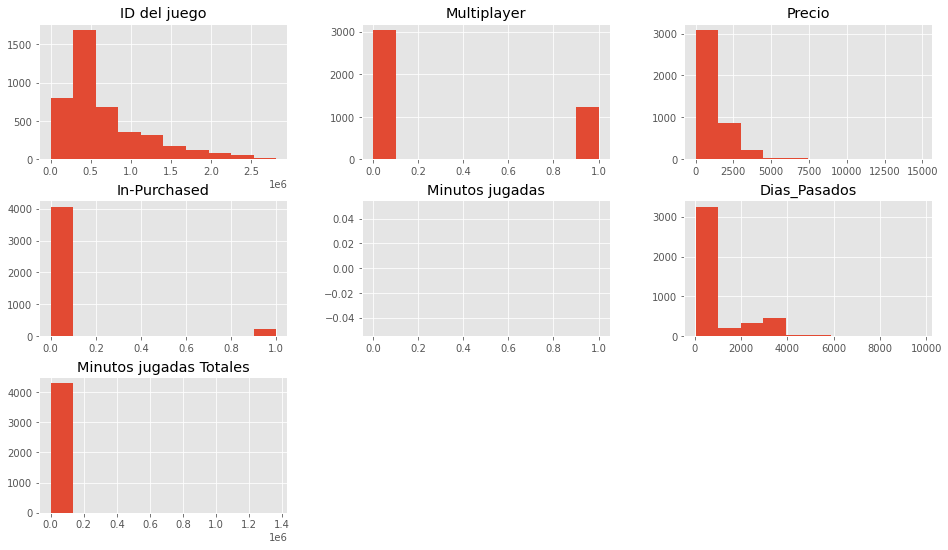

In [ ]:
data1.hist()
plt.show()

In [ ]:
print(data1.groupby('In-Purchased').size())

In-Purchased
0    4067
1     222
dtype: int64


In [ ]:
print(data1.groupby('Minutos jugadas Totales').size())

Minutos jugadas Totales
1          97
2          34
3          32
4          21
5          13
           ..
186355      1
193948      1
216893      1
237354      1
1363641     1
Length: 2107, dtype: int64


c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


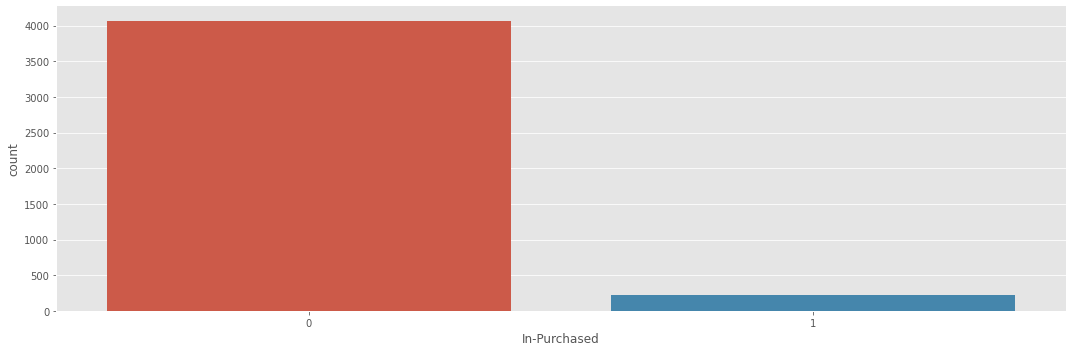

In [ ]:
sb.factorplot('In-Purchased',data=data1,kind="count", aspect=3)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


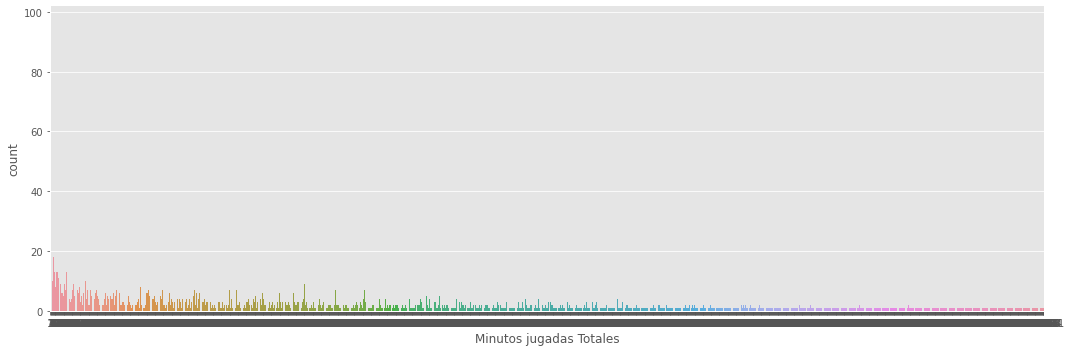

In [ ]:
sb.factorplot('Minutos jugadas Totales',data=data1,kind="count", aspect=3)

c:\Users\rodri\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


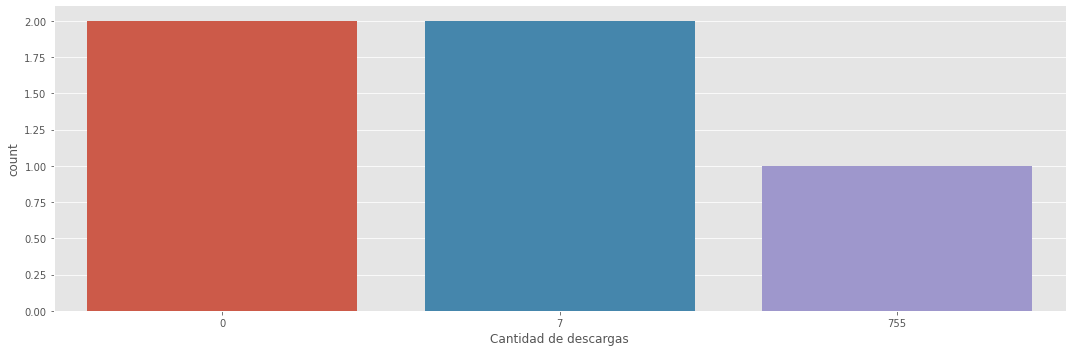

In [ ]:
sb.catplot('Cantidad de descargas',data=data1.head(),kind="count", aspect=3)

In [ ]:
# Convertir la columna de cadena a tipo entero
data1['Cantidad de descargas'] = pd.to_numeric(data1['Cantidad de descargas'], errors='coerce').astype('Int64')
data1['Cantidad de descargas'] = data1['Cantidad de descargas'].fillna(0)


In [ ]:
X = data1[['Cantidad de descargas','Minutos jugadas Totales']].values
y = data1['In-Purchased'].values
 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
data1.dtypes

ID del juego                 int64
Géneros                     object
Categorías                  object
Fecha de Lanzamiento        object
Multiplayer                float64
Cantidad de descargas        Int64
Precio                       int64
In-Purchased                 int64
Minutos jugadas            float64
Fecha                       object
Dias_Pasados                 int64
Minutos jugadas Totales      int64
dtype: object

In [ ]:
n_neighbors = 7
 
knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 0.95


In [ ]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[1018    1]
 [  52    2]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1019
           1       0.67      0.04      0.07        54

    accuracy                           0.95      1073
   macro avg       0.81      0.52      0.52      1073
weighted avg       0.94      0.95      0.93      1073



In [ ]:
#
#h = .0000001  # step size in the mesh
 
# Create color maps
#cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
#cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])
 
# we create an instance of Neighbours Classifier and fit the data.
#clf = KNeighborsClassifier(n_neighbors, weights='distance')
#clf.fit(X, y)
 
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
#x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 #                        np.arange(y_min, y_max, h))
#Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
#Z = Z.reshape(xx.shape)
#plt.figure()
#plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
 
# Plot also the training points
#plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
 #               edgecolor='k', s=20)
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
    
#patch0 = mpatches.Patch(color='#FF0000', label='1')
#patch1 = mpatches.Patch(color='#ff9933', label='2')
#patch2 = mpatches.Patch(color='#FFFF00', label='3')
#patch3 = mpatches.Patch(color='#00ffff', label='4')
#patch4 = mpatches.Patch(color='#00FF00', label='5')
#plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])
 
    
#plt.title("5-Class classification (k = %i, weights = '%s')"
 #             % (n_neighbors, weights))
 
#plt.show()

MemoryError: Unable to allocate 1.75 TiB for an array with shape (240380000000,) and data type float64

In [ ]:
# 1. Cargar los datos desde el CSV
#data = pd.read_csv('tu_archivo.csv')

# Seleccionar las columnas de interés
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Dias_Pasados','Precio']]
y = data1['In-Purchased']  # Supongamos que 'Target' es la columna que representa la variable objetivo

# 2. Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Escalar las características (opcional pero recomendado)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Inicializar los modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# 5. Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# 6. Mostrar los resultados
for name, accuracy in results.items():
    print(f'{name}: Accuracy = {accuracy}')
    
from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)


Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9242424242424242
Random Forest: Accuracy = 0.9335664335664335
SVM: Accuracy = 0.9393939393939394
Error cuadrático medio (MSE): 0.06060606060606061


In [ ]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Dias_Pasados','Precio']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9207459207459208
Random Forest: Accuracy = 0.9382284382284383
SVM: Accuracy = 0.9358974358974359


In [ ]:
# Definir una función para evaluar los modelos usando validación cruzada
def evaluar_modelo(modelo, X, y):
    scores = cross_val_score(modelo, X, y, cv=5)
    return scores.mean(), scores.std()

# Comparar los modelos
resultados = {}
for nombre, modelo in models.items():
    media, desviacion = evaluar_modelo(modelo, X, y)
    resultados[nombre] = (media, desviacion)

mejor_modelo = max(resultados, key=lambda k: resultados[k][0])
print("El mejor modelo es:", mejor_modelo)

# Imprimir los resultados
for nombre, (media, desviacion) in resultados.items():
    print(f"{nombre}: Accuracy medio = {media}, Desviación estándar = {desviacion}")

# Interpretar los resultados
# Analiza los resultados y toma una decisión sobre qué modelo es el mejor en función de las métricas y tus objetivos específicos.


El mejor modelo es: Logistic Regression
Logistic Regression: Accuracy medio = 0.9487059809113484, Desviación estándar = 0.001648441338704036
Decision Tree: Accuracy medio = 0.934253766459134, Desviación estándar = 0.010882671147939886
Random Forest: Accuracy medio = 0.9440428882669256, Desviación estándar = 0.00526420918438021
SVM: Accuracy medio = 0.948239780445148, Desviación estándar = 0.0005616301555068673


C:\Users\rodri\AppData\Local\Temp\ipykernel_30956\2495174573.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


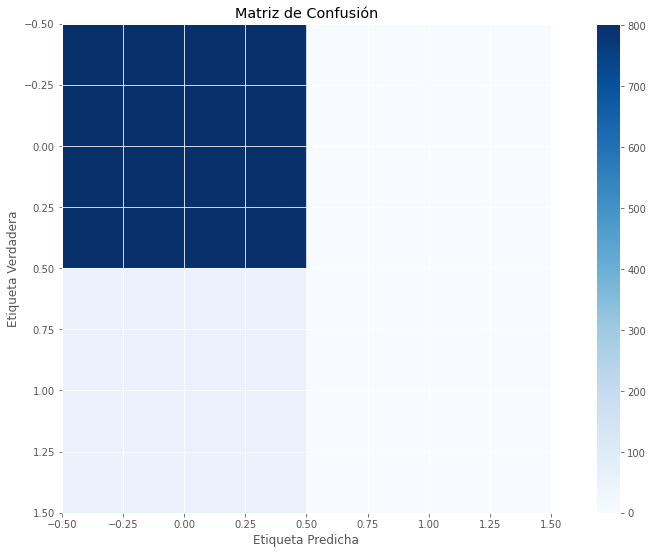

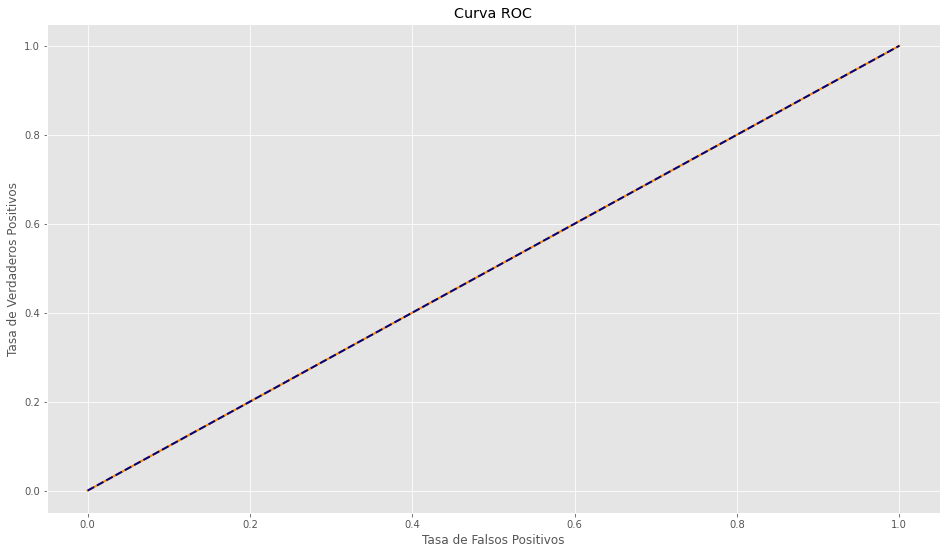

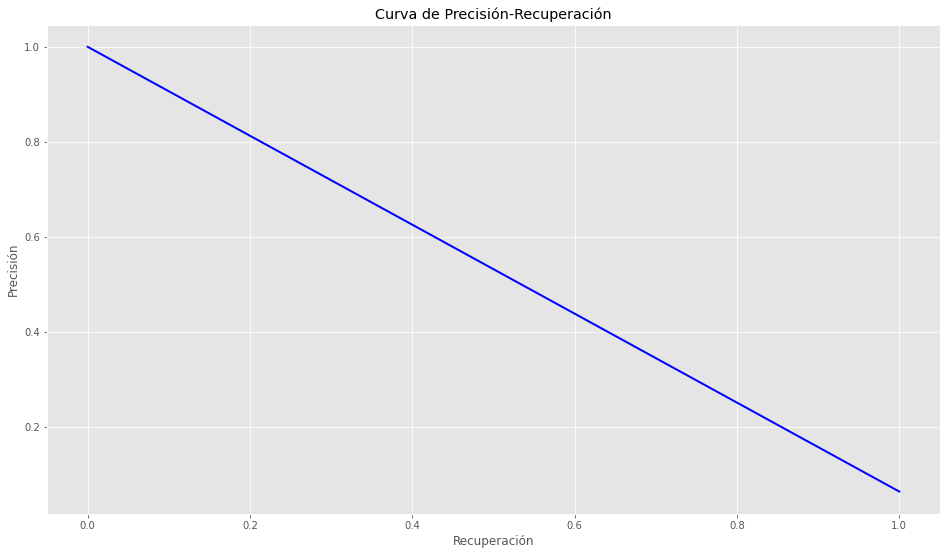

In [ ]:
# Supongamos que y_true son las etiquetas verdaderas y y_pred son las predicciones del modelo
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
plt.figure()
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.colorbar()
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.show()

# Calculamos la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Graficamos la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.show()

# Calculamos la curva de precisión-recuperación
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Graficamos la curva de precisión-recuperación
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recuperación')
plt.ylabel('Precisión')
plt.title('Curva de Precisión-Recuperación')
plt.show()


In [26]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Dias_Pasados']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Logistic Regression: Accuracy = 0.9335664335664335
Decision Tree: Accuracy = 0.9067599067599068
Random Forest: Accuracy = 0.9358974358974359
SVM: Accuracy = 0.9358974358974359
Error cuadrático medio (MSE): 0.06060606060606061


In [27]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Cantidad de descargas','Minutos jugadas Totales','Precio','Multiplayer']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9265734265734266
Random Forest: Accuracy = 0.9312354312354313
SVM: Accuracy = 0.9358974358974359
Error cuadrático medio (MSE): 0.06060606060606061


In [28]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Cantidad de descargas','Dias_Pasados','Precio']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Logistic Regression: Accuracy = 0.9347319347319347
Decision Tree: Accuracy = 0.9347319347319347
Random Forest: Accuracy = 0.9417249417249417
SVM: Accuracy = 0.9382284382284383
Error cuadrático medio (MSE): 0.06060606060606061


In [29]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Minutos jugadas Totales','Dias_Pasados','Precio']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)

print("Error cuadrático medio (MSE):", mse)

Logistic Regression: Accuracy = 0.9335664335664335
Decision Tree: Accuracy = 0.9207459207459208
Random Forest: Accuracy = 0.9358974358974359
SVM: Accuracy = 0.9358974358974359
Error cuadrático medio (MSE): 0.06060606060606061


In [33]:
#AQUI MFS
#
#HERE MFS
# Seleccionar las características (variables independientes) y la etiqueta (variable dependiente)
X = data1[['Dias_Pasados']]
y = data1['In-Purchased'] 

# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar los modelos
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()

# Entrenar los modelos
log_reg.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Realizar predicciones
y_pred_log_reg = log_reg.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_svm = svm.predict(X_test)

# Evaluar el desempeño de los modelos
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir los resultados
print("Logistic Regression: Accuracy =", accuracy_log_reg)
print("Decision Tree: Accuracy =", accuracy_decision_tree)
print("Random Forest: Accuracy =", accuracy_random_forest)
print("SVM: Accuracy =", accuracy_svm)


from sklearn.metrics import mean_squared_error

# y_true son los valores reales y y_pred son las predicciones del modelo
mse = mean_squared_error(y_test, y_pred)
mse1 = mean_squared_error(accuracy_log_reg, y_pred)
mse2 = mean_squared_error(accuracy_decision_tree, y_pred)
mse3 = mean_squared_error(accuracy_random_forest, y_pred)
mse4 = mean_squared_error(accuracy_svm, y_pred)

print("Error cuadrático medio (MSE):", mse)
print("Error cuadrático medio (MSE):", mse1)
print("Error cuadrático medio (MSE):", mse2)
print("Error cuadrático medio (MSE):", mse3)
print("Error cuadrático medio (MSE):", mse4)

Logistic Regression: Accuracy = 0.9358974358974359
Decision Tree: Accuracy = 0.9265734265734266
Random Forest: Accuracy = 0.9265734265734266
SVM: Accuracy = 0.9358974358974359


TypeError: Singleton array 0.9358974358974359 cannot be considered a valid collection.